# Entertainer Data Analysis 

In [5]:
import numpy as np

In [6]:
import pandas as pd

In [7]:
import matplotlib.pyplot as plt

In [8]:
data = pd.read_excel(r'C:\Users\mshas\Data Analytics Dashboard\Entertainers Data Analysis\Entertainer - Final.xlsx')

In [9]:
data.head()

,Entertainer,Gender (traditional),Birth Year,Year of Breakthrough/#1 Hit/Award Nomination,Breakthrough Name,Year of First Oscar/Grammy/Emmy,Year of Last Major Work (arguable),Year of Death,Award Won from Breakthrough,Total Awards won,Total Nominees,Profession,Oscar Won,Grammy Won,Emmy Won,Other Awards
0,Adele,F,1988,2008,19,2009.0,2016,NaN,Grammy,32,64,Singer,1,15,0,16
1,Angelina Jolie,F,1975,1999,"Girl, Interrupted",1999.0,2016,NaN,Oscar,58,174,Actor,1,0,0,57
2,Aretha Franklin,F,1942,1967,I Never Loved a Man (The Way I Love You),1968.0,2014,NaN,No Award,29,67,Singer,0,20,0,9
3,Bette Davis,F,1908,1934,Of Human Bondage,1935.0,1989,1989.0,No Award,34,57,Actor,2,0,1,31
4,Betty White,F,1922,1952,Life with Elilzabeth,1976.0,2016,NaN,Emmy,39,79,Actor,0,2,5,32


# 1. How many male and female entertainers are there ?

In [10]:
print(data.columns)

Index(['Entertainer', 'Gender (traditional)', 'Birth Year',
       'Year of Breakthrough/#1 Hit/Award Nomination', 'Breakthrough Name',
       'Year of First Oscar/Grammy/Emmy', 'Year of Last Major Work (arguable)',
       'Year of Death', 'Award Won from Breakthrough', 'Total Awards won',
       'Total Nominees', 'Profession', 'Oscar Won', 'Grammy Won', 'Emmy Won',
       'Other Awards '],
      dtype='object')


In [11]:
genders = data['Gender (traditional)'].to_numpy()

In [12]:
unique_genders, gender_counts = np.unique(genders, return_counts=True)

In [13]:
gender_count_dict = dict(zip(unique_genders, gender_counts))

In [14]:
for gender, count in gender_count_dict.items():
    print(f"Number of {gender} entertainers: {count}")

Number of F entertainers: 20
Number of M entertainers: 50


# 2. How many Entertainers had a Breakthrough in the year 2000 or later ?

In [15]:
entertainer_names = data['Entertainer'].to_numpy()

In [19]:
breakthrough_years = data['Year of Breakthrough/#1 Hit/Award Nomination'].to_numpy()

In [20]:
indices = np.where(breakthrough_years >= 2000)[0]

In [21]:
for i in range(4):
    index = indices[i]
    name = entertainer_names[index]
    year = breakthrough_years[index]
    print(f"Entertainer: {name}, Breakthrough Year: {year}")

Entertainer: Adele, Breakthrough Year: 2008
Entertainer: Justin Timberlake, Breakthrough Year: 2000
Entertainer: Keifer Sutherland, Breakthrough Year: 2001
Entertainer: Lady Gaga, Breakthrough Year: 2008


# 3. who is the oldest Entertainer in the dataset ?

In [22]:
birth_years = data['Birth Year'].to_numpy()

In [23]:
oldest_index = np.argmin(birth_years)

In [24]:
oldest_entertainer = data.loc[oldest_index, 'Entertainer']

In [25]:
print("Oldest Entertainer:", oldest_entertainer)

Oldest Entertainer: Charlie Chaplin


# 4. How many Entertainers have won an Oscar ?

In [26]:
entertainer_names = data['Entertainer'].to_numpy()

In [27]:
oscar_won = data['Oscar Won'].to_numpy()

In [28]:
indices = np.where(oscar_won > 0)[0]

In [29]:
print("Entertainers who have won an Oscar:")
for index in indices:
    name = entertainer_names[index]
    print(name)

Entertainers who have won an Oscar:
Adele
Angelina Jolie
Bette Davis
Bing Crosby
Charlie Chaplin
Clark Gable
Denzel Washington
Dustin Hoffman
Elton John
Frank Sinatra
Gene Hackman
Gregory Peck
Humphrey Bogart
Jimmy Stewart
Joan Crawford
John Lennon
John Wayne
Katherine Hepburn
Lady Gaga
Leonardo DiCaprio
Marlon Brando
Meryl Streep
Morgan Freeman
Paul McCartney
Paul Newman
Prince
Robert Redford
Sidney Poitier
Stevie Wonder
Tom Hanks


In [30]:
num_oscar_winners = np.sum(oscar_won > 0)

In [31]:
print("Number of entertainers who have won an Oscar:", num_oscar_winners)

Number of entertainers who have won an Oscar: 30


# 5. How many Entertainers have won awards other than Oscar, Grammy or Emmy ?

In [32]:
other_awards = data['Other Awards '].to_numpy()

In [33]:
num_other_award_winners = np.sum(other_awards > 0)

In [34]:
print("Number of entertainers who have won other awards:", num_other_award_winners)

Number of entertainers who have won other awards: 68


# 6. What is the average number of awards won by Entertainers ?

In [37]:
awards_won = data['Total Awards won'].to_numpy()

In [38]:
average_awards_won = np.mean(awards_won)

In [39]:
average_awards_won = int(average_awards_won)

In [40]:
print("Average number of awards won by entertainers:", average_awards_won)

Average number of awards won by entertainers: 33


# 7. How many entertainers have received an Oscar, a Grammy, and an Emmy?

In [41]:
oscar_won = data['Oscar Won'].to_numpy()

In [42]:
grammy_won = data['Grammy Won'].to_numpy()

In [43]:
emmy_won = data['Emmy Won'].to_numpy()

In [44]:
indices = np.where((oscar_won > 0) & (grammy_won > 0) & (emmy_won > 0))

In [45]:
num_entertainers = len(indices[0])

In [46]:
print("Numer of Entertainers with an Oscar, a Grammy and an Emmy :", num_entertainers)

Numer of Entertainers with an Oscar, a Grammy and an Emmy : 0


# 8. What is the percentage of Entertainers who have won an Award from their Breakthrough ?

In [47]:
award_won_from_breakthrough = data['Award Won from Breakthrough'].to_numpy()

In [48]:
num_entertainers_with_award = np.count_nonzero(award_won_from_breakthrough)

In [49]:
total_entertainers = data.shape[0]

In [50]:
percentage = (num_entertainers_with_award / total_entertainers) * 100

In [51]:
print("Percentage of entertainers who have won an award from their breakthrough:", percentage)

Percentage of entertainers who have won an award from their breakthrough: 100.0


# 9. How many Entertainers have received a total of more than 50 awards ?

In [52]:
total_awards = data['Total Awards won'].to_numpy()

In [53]:
indices = np.where(total_awards > 50)

In [54]:
num_entertainers = len(indices[0])

In [55]:
print("Number of entertainers with more than 50 awards:", num_entertainers)

Number of entertainers with more than 50 awards: 14


# 10. Determine the number of Entertainers who have not received awards in the dataset ?

In [57]:
total_awards = data['Total Awards won'].to_numpy()

In [58]:
indices = np.where(total_awards == 0)

In [59]:
num_entertainers = len(indices[0])

In [60]:
print("Number of entertainers with no awards:", num_entertainers)

Number of entertainers with no awards: 0


# 11. How many entertainers are there in each gender category ?

In [61]:
genders = data['Gender (traditional)'].to_numpy()

In [62]:
unique_genders, gender_counts = np.unique(genders, return_counts=True)

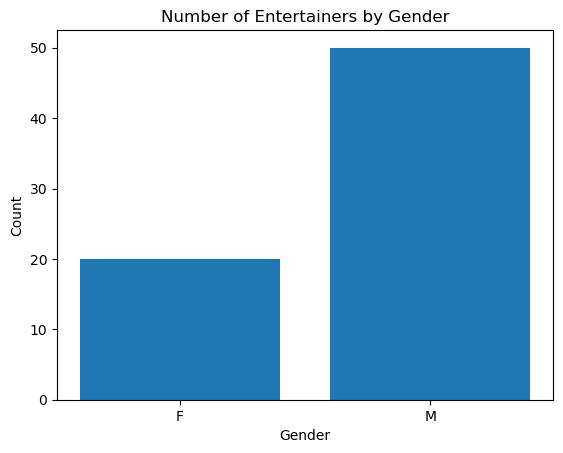

In [67]:
plt.bar(unique_genders, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Entertainers by Gender')
plt.show()

# 12. What are the top 10 entertainers with the most awards?

In [68]:
sorted_data = data.sort_values(by='Total Awards won', ascending=False)

In [69]:
top_10 = sorted_data.head(10)

In [71]:
entertainer_names = top_10['Entertainer'].to_numpy()

In [72]:
awards_counts = top_10['Total Awards won'].to_numpy()

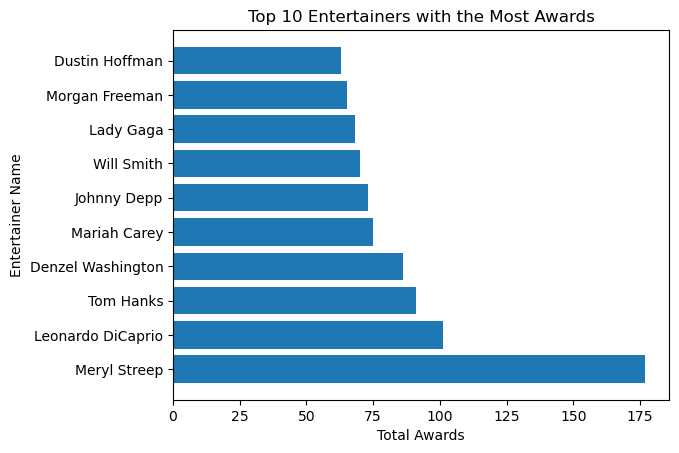

In [81]:
plt.barh(entertainer_names, awards_counts)
plt.xlabel('Total Awards')
plt.ylabel('Entertainer Name')
plt.title('Top 10 Entertainers with the Most Awards')
plt.show()

# 13 How many entertainers belong to each profession category?

In [82]:
professions = data['Profession'].to_numpy()

In [83]:
unique_professions, profession_counts = np.unique(professions, return_counts=True)

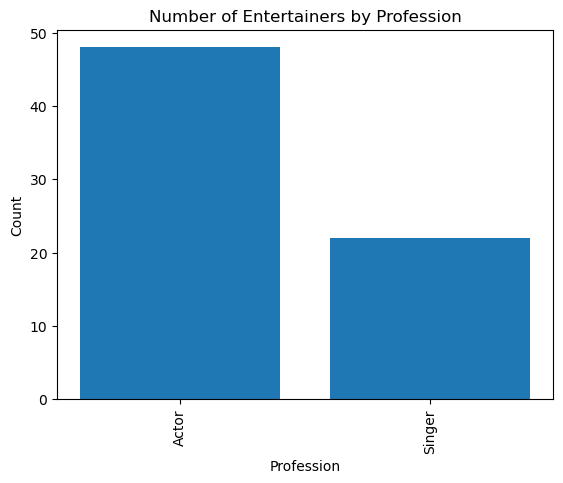

In [84]:
plt.bar(unique_professions, profession_counts)
plt.xlabel('Profession')
plt.ylabel('Count')
plt.title('Number of Entertainers by Profession')
plt.xticks(rotation=90)
plt.show()

# - By Shashikant Maurya